# SIDDHANT GEDAM 

## YouTube Text Data Analysis

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# !pip install textblob

### Sentiment Analysis

In [2]:
comm = pd.read_csv('GBcomments.csv',error_bad_lines=False)  

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comm.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [4]:
try:
    from textblob import TextBlob
    print("Successfull")
except:
    print("Unsuccessful")

Successfull


In [5]:
## Polarity of comments

In [6]:
TextBlob("It's more accurate to call it the M+ (1000) be").sentiment.polarity

0.45000000000000007

In [7]:
## Checking null values in dataset

In [8]:
comm.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [9]:
# droping null values
comm.dropna(inplace=True)

In [10]:
comm.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [11]:
sen =[]
for i in comm['comment_text']:
    sen.append(TextBlob(i).sentiment.polarity)

In [12]:
sensub = []
for i in comm['comment_text']:
    sensub.append(TextBlob(i).sentiment.subjectivity)

In [13]:
# assigning values to new column 

In [14]:
comm['Polarity']=sen
comm['Subjectivity']=sensub

In [15]:
comm.head()

,video_id,comment_text,likes,replies,Polarity,Subjectivity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45,0.566667
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00,0.300000


In [16]:
# using Wordcloud

In [17]:
#!pip install wordCloud

In [18]:
positive_comm=comm[comm['Polarity']== 1]

In [19]:
from wordcloud import WordCloud,STOPWORDS

In [20]:
stopwrds = set(STOPWORDS)

In [21]:
txtwc = " ".join(positive_comm["comment_text"])

In [22]:
wrdclds = WordCloud(width=1000, height =1000,stopwords=stopwrds).generate(txtwc)

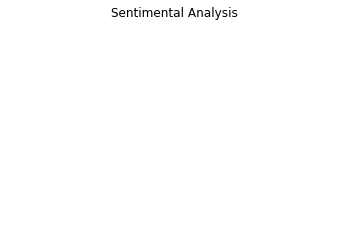

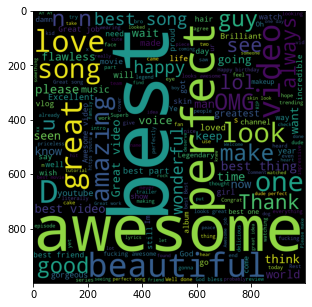

In [23]:
plt.axis("off")
plt.title("Sentimental Analysis")
plt.figure(figsize = (5,5))
plt.imshow(wrdclds)

In [24]:
## Analyzing trending tags

In [25]:
videos = pd.read_csv("USvideos.csv",error_bad_lines = False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [26]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [27]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [28]:
tags_total = " ".join(videos['tags'])

In [29]:
# Joining tags and removing special character |

In [30]:
import re

In [31]:
tags = re.sub('[^a-zA-z]',' ',tags_total)

In [32]:
tags=re.sub(' +',' ',tags)

In [33]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone [none] apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster

In [34]:
Wrdcloud = WordCloud(stopwords=stopwrds).generate(tags)

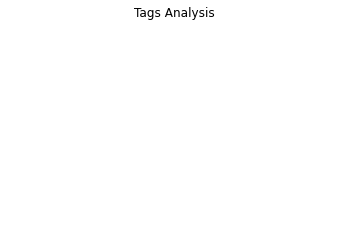

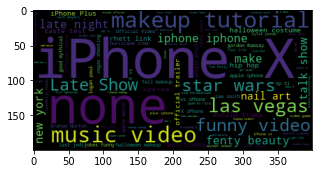

In [35]:
plt.axis("off")
plt.title("Tags Analysis")
plt.figure(figsize = (5,5))
plt.imshow(Wrdcloud)

### Likes, Views and Dislike correlation

Text(0, 0.5, 'Likes')

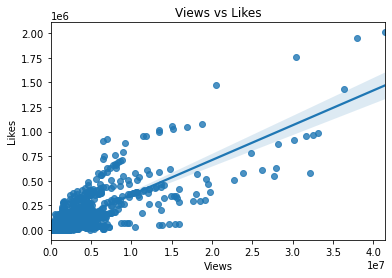

In [36]:
sns.regplot(x='views',y='likes',data=videos)
plt.title("Views vs Likes")
plt.xlabel("Views")
plt.ylabel("Likes")

Text(0, 0.5, 'dislikes')

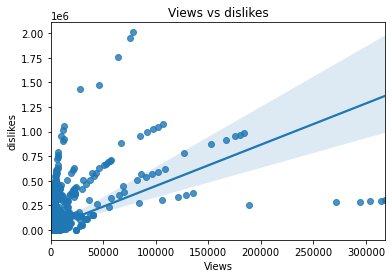

In [37]:
sns.regplot(x='dislikes',y='likes',data=videos)
plt.title("Views vs dislikes")
plt.xlabel("Views")
plt.ylabel("dislikes")

In [38]:
# From this we can infer that the likes increases at a faster rate  tahn dislikes as the views increases.

In [39]:
df= videos[['views','likes','dislikes']]

In [40]:
df_corr = df.corr()

In [41]:
df_corr

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


<AxesSubplot:>

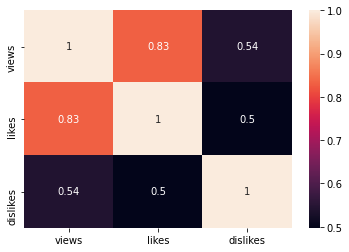

In [42]:
sns.heatmap(df_corr,annot=True)